# FLIGHT DELAY PREDICTION

In [1]:
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline 
#matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas_profiling
import warnings   # to ignore warnings

#import all libraries and modules at the beginning of the code

# LOADING THE DATASETS

In [2]:
#reading the datasets
train = pd.read_csv('train_flight.csv')
test= pd.read_csv('test_flight.csv')

In [3]:
train.head()#Previewing the dataset

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [5]:
train.isnull().sum() #Checking for missing values

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [6]:
test.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
dtype: int64

# DESCRIPTIVE STATISTICS USING PANDAS PROFILING

In [7]:
#import pandas_profiling 
#train.profile_report()

# DATA VISUALIZATION

In [8]:
train['STATUS'].value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: STATUS, dtype: int64

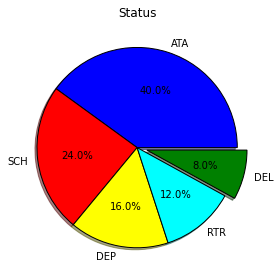

In [9]:
slices= [100,60,40,30,20] #adding percentage to my chart
labels = ['ATA','SCH','DEP','RTR','DEL']
colors =['blue','red','yellow','cyan','green']
explode =[0,0,0,0,0.1]
plt.pie(slices,labels=labels,colors=colors, explode=explode, shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Status')
plt.tight_layout()

plt.show()

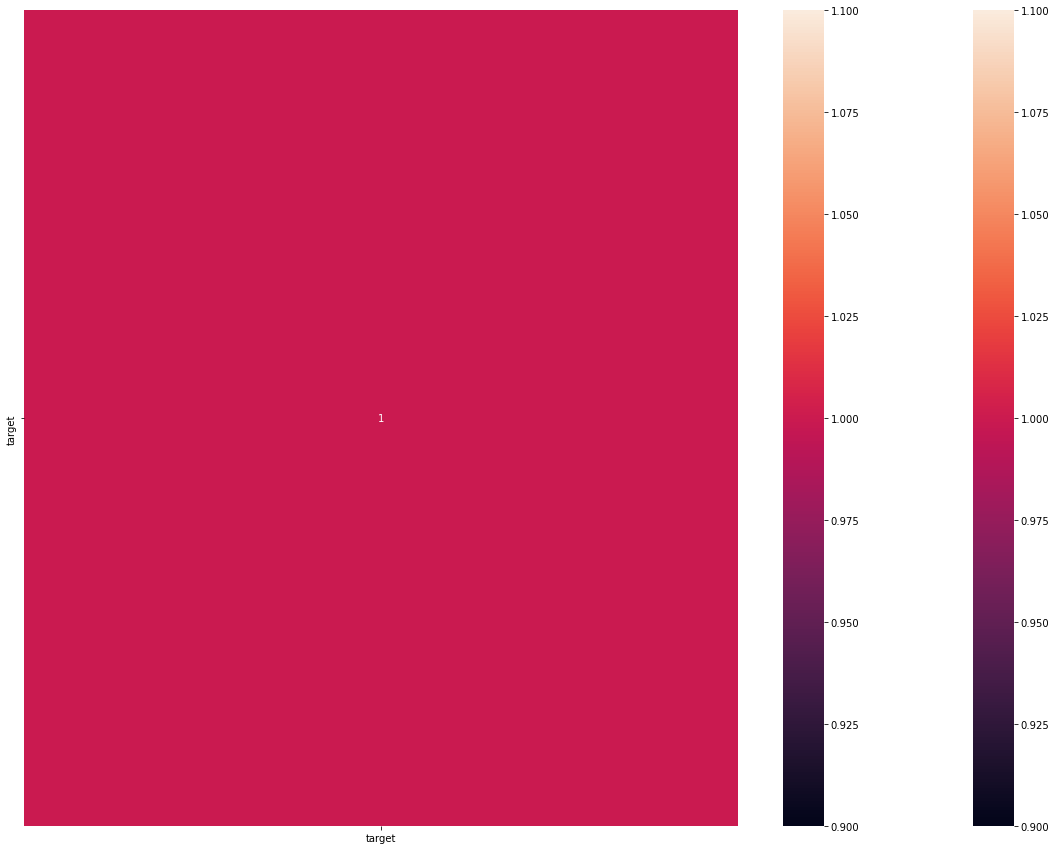

In [10]:
plt.figure(figsize=(20, 15))
        #This specifies the size, the bigger the map,the easier we can  understand the map
    
sns.heatmap(train.corr())
        #This is sufficient but adding the 'annot' argument makes interpretation easier
    
sns.heatmap(train.corr(), annot = True) # 'annot' helps display the correlation coefficient


plt.show()

# DATETIME EXTRACTION

In [11]:
from datetime import datetime

In [12]:
train['DATOP']= pd.to_datetime(train['DATOP'], format='%Y-%m-%d')

In [13]:
train['STD']= pd.to_datetime(train['STD'], format='%Y-%m-%d %H:%M:%S')

In [14]:
train['STA']= pd.to_datetime(train['STA'], format='%Y-%m-%d %H.%M.%S')

In [15]:
date_column = ['STD','STA','DATOP']
def extract_date(train,cols,):
    for x in cols:
        train[x+'_year']= train[x].dt.year
        train[x+'_month']= train[x].dt.month
        train[x+'_day']= train[x].dt.day
        train[x+'_hour']= train[x].dt.hour
        train[x+'_minute']= train[x].dt.minute
        train[x+'_second']= train[x].dt.second
    train.drop(columns=date_column, axis=1, inplace=True)
extract_date(train,date_column) 

In [16]:
train

,ID,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,STD_year,STD_month,STD_day,...,STA_day,STA_hour,STA_minute,STA_second,DATOP_year,DATOP_month,DATOP_day,DATOP_hour,DATOP_minute,DATOP_second
0,train_id_0,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,2016,1,3,...,3,12,55,0,2016,1,3,0,0,0
1,train_id_1,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,2016,1,13,...,13,16,55,0,2016,1,13,0,0,0
2,train_id_2,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,2016,1,16,...,16,6,45,0,2016,1,16,0,0,0
3,train_id_3,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,2016,1,17,...,17,17,0,0,2016,1,17,0,0,0
4,train_id_4,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,2016,1,17,...,17,15,50,0,2016,1,17,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,2018,7,5,...,6,2,0,0,2018,7,5,0,0,0
107829,train_id_107829,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,2018,1,13,...,13,9,0,0,2018,1,13,0,0,0
107830,train_id_107830,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,2018,11,7,...,7,12,50,0,2018,11,7,0,0,0
107831,train_id_107831,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,2018,1,23,...,23,18,45,0,2018,1,23,0,0,0


In [17]:
test['DATOP']= pd.to_datetime(test['DATOP'], format='%Y-%m-%d')

In [18]:
test['STD']= pd.to_datetime(test['STD'], format='%Y-%m-%d %H:%M:%S')

In [19]:
test['STA']= pd.to_datetime(test['STA'], format='%Y-%m-%d %H.%M.%S')

In [20]:
date_column = ['STD','STA','DATOP']
def extract_date(test,cols,):
    for x in cols:
        test[x+'_year']= test[x].dt.year
        test[x+'_month']= test[x].dt.month
        test[x+'_day']= test[x].dt.day
        test[x+'_hour']= test[x].dt.hour
        test[x+'_minute']= test[x].dt.minute
        test[x+'_second']= test[x].dt.second
    test.drop(columns=date_column, axis=1, inplace=True)
extract_date(test,date_column) 

In [21]:
test

,ID,FLTID,DEPSTN,ARRSTN,STATUS,AC,STD_year,STD_month,STD_day,STD_hour,...,STA_day,STA_hour,STA_minute,STA_second,DATOP_year,DATOP_month,DATOP_day,DATOP_hour,DATOP_minute,DATOP_second
0,test_id_0,TU 0700,DJE,TUN,ATA,TU 32AIMF,2016,5,4,6,...,4,7,30,0,2016,5,4,0,0,0
1,test_id_1,TU 0395,TUN,BKO,ATA,TU 320IMW,2016,5,5,15,...,5,20,5,0,2016,5,5,0,0,0
2,test_id_2,TU 0745,FRA,TUN,ATA,TU 32AIMC,2016,5,6,10,...,6,12,25,0,2016,5,6,0,0,0
3,test_id_3,TU 0848,BEY,TUN,ATA,TU 31BIMO,2016,5,11,9,...,11,13,10,0,2016,5,11,0,0,0
4,test_id_4,TU 0635,ORY,MIR,ATA,TU 736IOQ,2016,5,11,9,...,11,12,35,0,2016,5,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,TU 0998,TUN,NCE,ATA,TU 320IMV,2018,9,12,14,...,12,15,45,0,2018,9,12,0,0,0
9329,test_id_9329,WKL 0000,TUN,TUN,SCH,TU 32AIMG,2018,9,27,22,...,28,1,0,0,2018,9,27,0,0,0
9330,test_id_9330,UG 1601,SJJ,TUN,SCH,TU CR9ISA,2018,9,3,9,...,3,11,10,0,2018,9,3,0,0,0
9331,test_id_9331,UG 0008,TUN,DJE,SCH,UG AT7LBD,2018,9,15,14,...,15,15,30,0,2018,9,15,0,0,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            107833 non-null  object 
 1   FLTID         107833 non-null  object 
 2   DEPSTN        107833 non-null  object 
 3   ARRSTN        107833 non-null  object 
 4   STATUS        107833 non-null  object 
 5   AC            107833 non-null  object 
 6   target        107833 non-null  float64
 7   STD_year      107833 non-null  int64  
 8   STD_month     107833 non-null  int64  
 9   STD_day       107833 non-null  int64  
 10  STD_hour      107833 non-null  int64  
 11  STD_minute    107833 non-null  int64  
 12  STD_second    107833 non-null  int64  
 13  STA_year      107833 non-null  int64  
 14  STA_month     107833 non-null  int64  
 15  STA_day       107833 non-null  int64  
 16  STA_hour      107833 non-null  int64  
 17  STA_minute    107833 non-null  int64  
 18  STA_

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9333 non-null   object
 1   FLTID         9333 non-null   object
 2   DEPSTN        9333 non-null   object
 3   ARRSTN        9333 non-null   object
 4   STATUS        9333 non-null   object
 5   AC            9333 non-null   object
 6   STD_year      9333 non-null   int64 
 7   STD_month     9333 non-null   int64 
 8   STD_day       9333 non-null   int64 
 9   STD_hour      9333 non-null   int64 
 10  STD_minute    9333 non-null   int64 
 11  STD_second    9333 non-null   int64 
 12  STA_year      9333 non-null   int64 
 13  STA_month     9333 non-null   int64 
 14  STA_day       9333 non-null   int64 
 15  STA_hour      9333 non-null   int64 
 16  STA_minute    9333 non-null   int64 
 17  STA_second    9333 non-null   int64 
 18  DATOP_year    9333 non-null   int64 
 19  DATOP_

In [24]:
train['FLTID'].value_counts()

WKL 0000     3105
TU 0613      1284
TU 0397      1184
AOG 0000     1103
TU 0634      1075
             ... 
TU 3237         1
TU 3888         1
UG 0212         1
TU 3445         1
TU 3804         1
Name: FLTID, Length: 1861, dtype: int64

In [25]:
train.drop(['ID','DATOP_hour','DATOP_minute','DATOP_second'],axis=1, inplace=True)

In [26]:
test.drop(['ID','DATOP_hour','DATOP_minute','DATOP_second'],axis=1, inplace=True)

In [27]:
print(len(train.columns))
print(len(test.columns))

21
20


In [28]:
#Split data into features and target
X = train.drop(['target'], axis='columns')
y = train['target']

# FEATURE ENGINEERING
CONVERTING CATEGORICAL VARIABLES TO NUMERICAL VARIABLES

In [29]:
#using get dummies function from pandas
X = pd.get_dummies(X)

In [30]:
X.head()

,STD_year,STD_month,STD_day,STD_hour,STD_minute,STD_second,STA_year,STA_month,STA_day,STA_hour,...,AC_TU CR9ISA,AC_TU CR9XXX,AC_UG AT7AT7,AC_UG AT7LBD,AC_UG AT7LBE,AC_UG CR9CR9,AC_UG CR9ISA,AC_UG CR9XXX,AC_UJ 320TCF,AC_X9 320VEB
0,2016,1,3,10,30,0,2016,1,3,12,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,13,15,5,0,2016,1,13,16,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,16,4,10,0,2016,1,16,6,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,17,14,10,0,2016,1,17,17,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,17,14,30,0,2016,1,17,15,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#using get dummies function from pandas
Y= pd.get_dummies(test)

In [32]:
Y.head()

,STD_year,STD_month,STD_day,STD_hour,STD_minute,STD_second,STA_year,STA_month,STA_day,STA_hour,...,AC_TU 736IOM,AC_TU 736ION,AC_TU 736IOP,AC_TU 736IOQ,AC_TU 736IOR,AC_TU CR9ISA,AC_UG AT7AT7,AC_UG AT7LBD,AC_UG AT7LBE,AC_UG AT7XXX
0,2016,5,4,6,40,0,2016,5,4,7,...,0,0,0,0,0,0,0,0,0,0
1,2016,5,5,15,20,0,2016,5,5,20,...,0,0,0,0,0,0,0,0,0,0
2,2016,5,6,10,0,0,2016,5,6,12,...,0,0,0,0,0,0,0,0,0,0
3,2016,5,11,9,40,0,2016,5,11,13,...,0,0,0,0,0,0,0,0,0,0
4,2016,5,11,9,50,0,2016,5,11,12,...,0,0,0,1,0,0,0,0,0,0


In [33]:
stop_hiding = [x for x in X.columns if x not in Y.columns] + [x for x in Y.columns if x not in X.columns]

In [35]:
stop_hiding = [x for x in X.columns if x not in Y.columns]
X.drop(columns = [x for x in stop_hiding if x in X.columns], axis = 1, inplace=True)
Y.drop(columns = [x for x in stop_hiding if x in Y.columns], axis = 1, inplace=True)

In [36]:
the_problems = [x for x in Y.columns if x not in X.columns]

In [38]:
Y.drop(columns = the_problems, axis = 1, inplace=True)

In [39]:
print(len(X.columns))
print(len(Y.columns))

873
873


# MODELLING

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 70)

In [41]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [42]:
answers_lr = linearmodel.predict(Y)

In [43]:
linearmodel_prediction = linearmodel.predict(X_test)
linearmodel_prediction

array([24.11911011, 47.34763718, 22.47716141, ..., 44.68278122,
       75.04655838, 51.18473053])

In [44]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)
MSE

1213936353257608.8

In [45]:
np.sqrt(MSE)

34841589.41922152

RANDOM FOREST REGRESSOR

In [46]:
from sklearn.ensemble import RandomForestRegressor
randomodel = RandomForestRegressor(max_depth=4, random_state=70,)
randomodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=70)

In [47]:
#from sklearn.preprocessing import MinMaxScaler
#x_scalar = MinMaxScaler()
#y_scaler = MinMaxScaler()
#input_X = x_scaler.fit_transform(df[['columns']])
#target_y = y_scaler.fit_transform(df[['target column']])

In [48]:
answers = randomodel.predict(Y)

In [49]:
randomodel_prediction = randomodel.predict(X_test)
randomodel_prediction

array([40.85730111, 41.58899167,  0.        , ..., 41.2640853 ,
       46.0356605 , 56.97474825])

In [50]:
MSE = metrics.mean_squared_error(y_test, randomodel_prediction)
MSE

14355.344275976144

In [51]:
np.sqrt(MSE)

119.81379000756192

Text(0.5, 1.0, 'Random Forest Regressor features importance (top 10):')

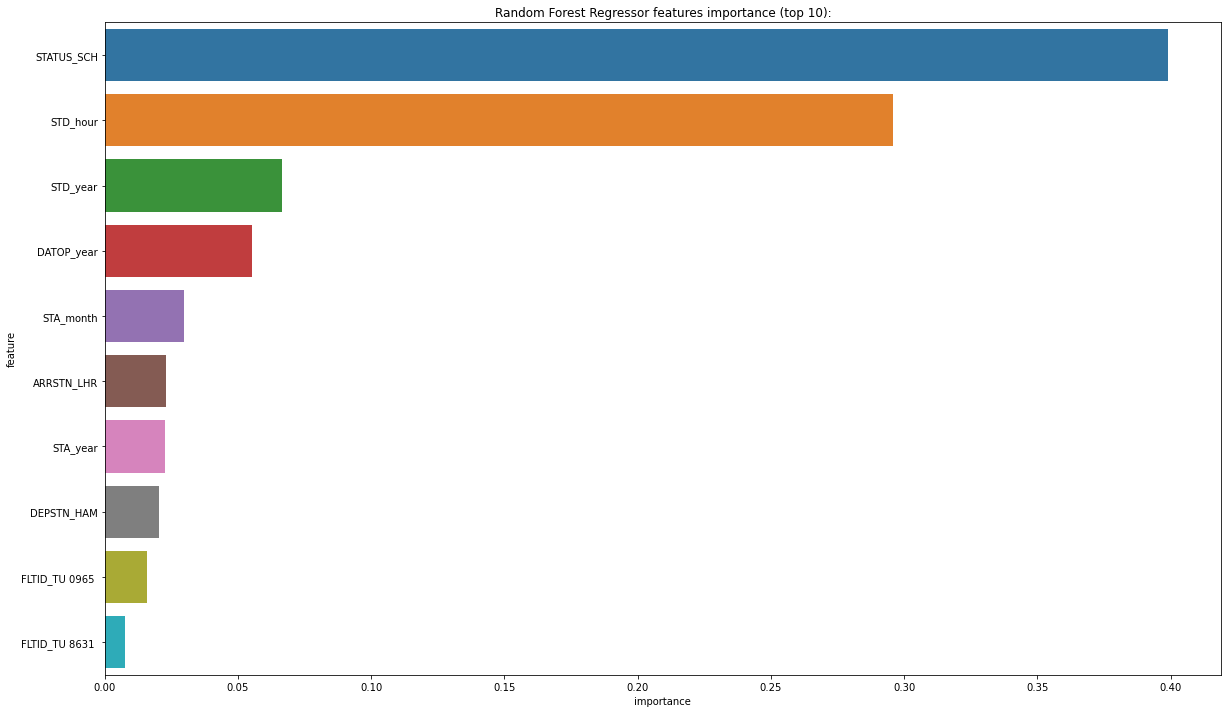

In [52]:
feature_importance_df = pd.DataFrame(randomodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('Random Forest Regressor features importance (top 10):')

EXTREME XGBOOST GRADIENT

In [53]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor(learning_rate=0.05, n_estimators=800, max_depth=4)
eval_set = [(X_test,y_test)]
xgboostmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 30, early_stopping_rounds=300)

[0]	validation_0-rmse:131.21912
[30]	validation_0-rmse:120.06290
[60]	validation_0-rmse:118.90904
[90]	validation_0-rmse:118.58134
[120]	validation_0-rmse:118.27470
[150]	validation_0-rmse:118.10717
[180]	validation_0-rmse:117.89157
[210]	validation_0-rmse:117.79117
[240]	validation_0-rmse:117.64648
[270]	validation_0-rmse:117.48762
[300]	validation_0-rmse:117.37642
[330]	validation_0-rmse:117.26536
[360]	validation_0-rmse:117.22586
[390]	validation_0-rmse:117.16196
[420]	validation_0-rmse:117.07156
[450]	validation_0-rmse:117.06338
[480]	validation_0-rmse:116.98614
[510]	validation_0-rmse:116.94501
[540]	validation_0-rmse:116.90337
[570]	validation_0-rmse:116.82272
[600]	validation_0-rmse:116.77144
[630]	validation_0-rmse:116.68717
[660]	validation_0-rmse:116.68398
[690]	validation_0-rmse:116.67895
[720]	validation_0-rmse:116.66700
[750]	validation_0-rmse:116.61215
[780]	validation_0-rmse:116.58667
[799]	validation_0-rmse:116.55348


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

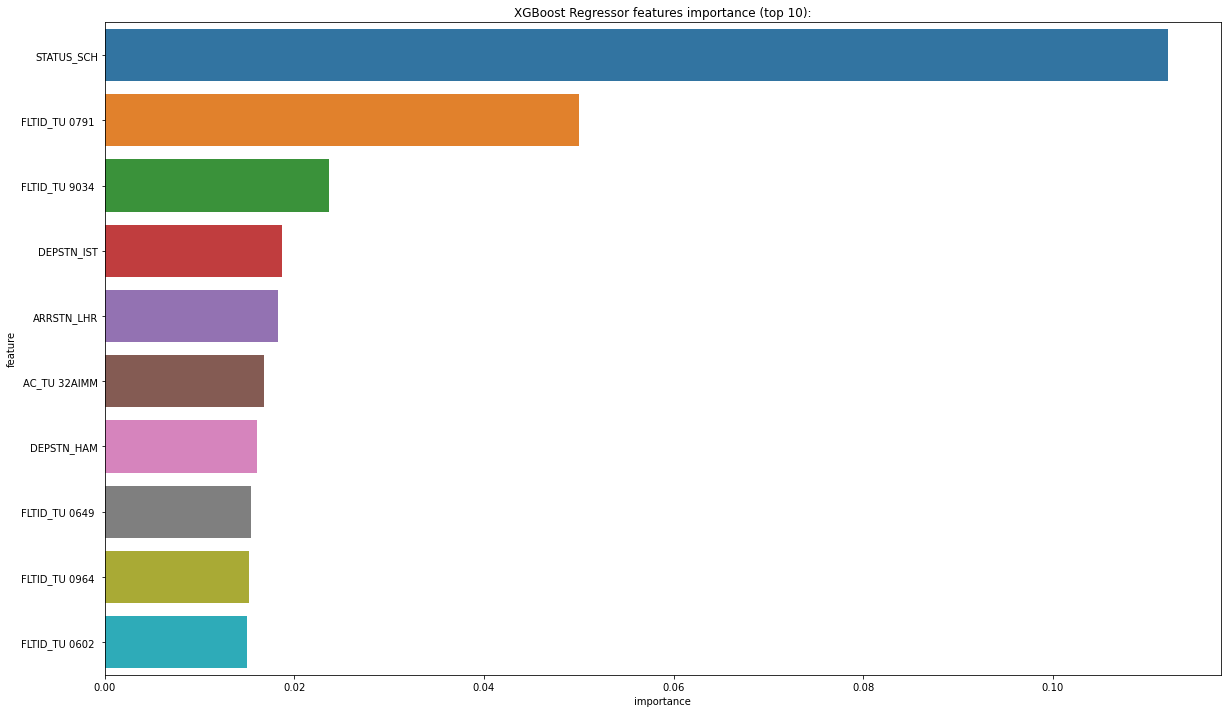

In [54]:
feature_importance_df = pd.DataFrame(xgboostmodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('XGBoost Regressor features importance (top 10):');

In [55]:
answers_xg = xgboostmodel.predict(Y)

C:\Users\OLADEJI\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [56]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [57]:
MSE = metrics.mean_squared_error(y_test, xgboostmodel_prediction)
MSE

13584.180587049794

In [58]:
np.sqrt(MSE)

116.55119298853099

LIGHT GRADIENT BOOSTING

In [59]:
from lightgbm import LGBMRegressor
lgbmmodel = LGBMRegressor(num_leaves=10,learning_rate=0.05,n_estimators=1000,max_depth=4,colsample_bytree=1, random_state=70)
eval_set = [(X_test,y_test)]
lgbmmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 50, early_stopping_rounds=300)

Training until validation scores don't improve for 300 rounds
[50]	valid_0's rmse: 118.931	valid_0's l2: 14144.6
[100]	valid_0's rmse: 118.266	valid_0's l2: 13986.9
[150]	valid_0's rmse: 117.938	valid_0's l2: 13909.4
[200]	valid_0's rmse: 117.702	valid_0's l2: 13853.8
[250]	valid_0's rmse: 117.528	valid_0's l2: 13812.8
[300]	valid_0's rmse: 117.397	valid_0's l2: 13782
[350]	valid_0's rmse: 117.309	valid_0's l2: 13761.3
[400]	valid_0's rmse: 117.224	valid_0's l2: 13741.3
[450]	valid_0's rmse: 117.171	valid_0's l2: 13729
[500]	valid_0's rmse: 117.086	valid_0's l2: 13709.1
[550]	valid_0's rmse: 117.03	valid_0's l2: 13696
[600]	valid_0's rmse: 116.936	valid_0's l2: 13674
[650]	valid_0's rmse: 116.897	valid_0's l2: 13665
[700]	valid_0's rmse: 116.86	valid_0's l2: 13656.2
[750]	valid_0's rmse: 116.828	valid_0's l2: 13648.8
[800]	valid_0's rmse: 116.797	valid_0's l2: 13641.6
[850]	valid_0's rmse: 116.751	valid_0's l2: 13630.9
[900]	valid_0's rmse: 116.725	valid_0's l2: 13624.8
[950]	valid_0's

LGBMRegressor(colsample_bytree=1, learning_rate=0.05, max_depth=4,
              n_estimators=1000, num_leaves=10, random_state=70)

In [60]:
answers_lgb = lgbmmodel.predict(Y)

In [61]:
lgbmodel_prediction = lgbmmodel.predict(X_test)

In [62]:
MSE = metrics.mean_squared_error(y_test, lgbmodel_prediction)
MSE

13611.966797728082

In [63]:
np.sqrt(MSE)

116.67033383739023

In [64]:
submission = pd.read_csv("SampleSubmission.csv")
submission.head()

,ID,target
0,test_id_0,2470
1,test_id_1,2944
2,test_id_2,2585
3,test_id_3,3264
4,test_id_4,1369


In [67]:
submission.target = answers_xg
submission.head()

,ID,target
0,test_id_0,20.379807
1,test_id_1,39.997879
2,test_id_2,31.908243
3,test_id_3,17.540512
4,test_id_4,20.730028


In [68]:
submission[["ID","target"]].to_csv("sca.csv", index=False)